__EXTENSIVE CHILDCARE COSTS IN THE UNITED STATES__

resentingGaA toryY singG ataA isualization_;Data storytelling project exploring childcare costs and affordability in the U.S. Communicated insights through blog, social media, and visual content tailored for different audiences


# Initial Setup

In [1]:
# Setting up references and libraries required for this exercise
import pandas as pd
import numpy as np
import os

from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px 
import matplotlib.cm as cm 
import textwrap
from textwrap import wrap, fill
from pandas.plotting import table
from statsmodels.graphics.mosaicplot import mosaic

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
# Getting the current working directory and loading the file 
dirpath = os.getcwd()

## US Childcare Prices: National database of Childcare Prices

In [3]:
# Loading the data as a pandas data frame 
filepath_ndcp = dirpath + "/ndcp_df.csv"
ndcp_data = pd.read_csv(filepath_ndcp)
ndcp_data

,STATE_NAME,STATE_ABBREVIATION,COUNTY_NAME,COUNTY_FIPS_CODE,STUDYYEAR,EMR_16,FEMR_16,MEMR_16,EMR_20to64,FEMR_20to64,...,MFCC48to53,MFCC54toSA,MFCCSA,MCINFANT,MCTODDLER,MCPRESCHOOL,MFCCINFANT,MFCCTODDLER,MFCCPRESCHOOL,STATE_FIPS
0,Alabama,AL,Autauga County,1001,2008,61.5,56.1,67.3,71.4,66.3,...,81.40,81.40,81.40,104.95,104.95,85.92,83.45,83.45,81.40,1
1,Alabama,AL,Autauga County,1001,2009,60.6,54.8,67.0,72.5,66.9,...,85.68,85.68,85.68,105.11,105.11,87.59,87.39,87.39,85.68,1
2,Alabama,AL,Autauga County,1001,2010,60.4,54.9,66.4,72.3,67.4,...,89.96,89.96,89.96,105.28,105.28,89.26,91.33,91.33,89.96,1
3,Alabama,AL,Autauga County,1001,2011,58.7,52.4,65.6,71.0,64.9,...,94.25,94.25,94.25,105.45,105.45,90.93,95.28,95.28,94.25,1
4,Alabama,AL,Autauga County,1001,2012,57.7,52.2,63.8,70.7,65.1,...,98.53,98.53,98.53,105.61,105.61,92.60,99.22,99.22,98.53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48303,Puerto Rico,PR,Yauco County,72153,2018,29.5,23.9,35.8,40.6,33.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72
48304,Puerto Rico,PR,Yauco County,72153,2019,28.8,24.0,34.2,39.3,33.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72
48305,Puerto Rico,PR,Yauco County,72153,2020,30.4,26.2,35.2,42.2,37.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72
48306,Puerto Rico,PR,Yauco County,72153,2021,32.1,29.1,35.6,44.9,42.2,...,87.69,87.69,81.93,73.79,73.79,73.85,97.77,97.77,87.69,72


In [4]:
# Using the shape() function to display the number of rows and columns in the dataset
rows = ndcp_data.shape[0]
columns = ndcp_data.shape[1]
print(f"The number of rows in the  dataset are {rows}")
print(f"The number of columns in the dataset are {columns}")

The number of rows in the  dataset are 48308
The number of columns in the dataset are 97


In [5]:
# Printing the datatype and studying the value counts
# ndcp_data.info(verbose=True)

## US Parents Survey: 2022 PEW RESEARCH CENTER’S AMERICAN TRENDS PANEL 
SURVEY OF AMERICAN PARENTS

In [6]:
# Loading the data as a pandas data frame 
filepath_ups = dirpath + "/USparents_survey2022.csv"
parents_survey = pd.read_csv(filepath_ups)
parents_survey

,QKEY,INTERVIEW_START_W115,INTERVIEW_END_W115,DEVICE_TYPE_W115,LANG_W115,XPANEL_W115,PARJOB_W115,RAISED_W115,RAISEDSIMOE_C1_W115,RAISEDSIMOE_C2_W115,...,F_INTFREQ,F_VOLSUM,F_INC_TIER2,F_KIDS1,F_KIDS2,WEIGHT_W115,WEIGHT_ELEM_W115,WEIGHT_MIDDLE_W115,WEIGHT_HIGH_W115,WEIGHT_K12_W115
0,162,2022-09-20T18:52:46Z,2022-09-20T19:10:49Z,2,2,1,3,4,NaN,NaN,...,4.0,2,1,1,2,3.464696,3.464696,0.000000,0.000000,3.464696
1,163,2022-09-20T18:53:22Z,2022-09-20T19:51:05Z,1,1,1,2,2,8.0,NaN,...,2.0,1,3,1,1,0.500483,0.000000,0.000000,0.500483,0.500483
2,164,2022-09-20T18:53:59Z,2022-09-20T19:13:57Z,3,1,1,1,3,NaN,NaN,...,1.0,2,1,1,2,2.427745,4.855489,0.000000,0.000000,2.427745
3,168,2022-09-20T18:55:56Z,2022-09-20T19:15:55Z,2,1,1,2,5,NaN,NaN,...,1.0,1,2,1,2,1.548307,1.548307,0.000000,0.000000,1.548307
4,169,2022-09-20T18:55:57Z,2022-09-24T12:05:23Z,2,1,1,1,5,NaN,NaN,...,1.0,2,3,1,1,1.637104,0.000000,3.274207,0.000000,1.637104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3752,202201052804,2022-09-22T17:46:24Z,2022-09-22T18:00:17Z,1,1,2,2,2,1.0,NaN,...,1.0,1,99,1,2,0.705692,1.764230,0.000000,0.000000,0.705692
3753,202201052952,2022-09-24T12:07:28Z,2022-09-24T13:20:59Z,2,1,2,2,4,NaN,NaN,...,1.0,1,1,1,2,0.137391,0.137391,0.000000,0.000000,0.137391
3754,202201053298,2022-09-22T11:20:51Z,2022-09-22T11:36:19Z,2,1,2,3,2,8.0,3.0,...,2.0,2,1,1,2,1.619946,1.619946,0.000000,0.000000,1.619946
3755,202201053784,2022-09-26T23:28:10Z,2022-09-26T23:48:15Z,2,1,2,3,5,NaN,NaN,...,2.0,2,1,1,1,0.430819,1.292456,0.000000,0.000000,0.430819


In [7]:
# Using the shape() function to display the number of rows and columns in the dataset
rows = parents_survey.shape[0]
columns = parents_survey.shape[1]
print(f"The number of rows in the  dataset are {rows}")
print(f"The number of columns in the dataset are {columns}")

The number of rows in the  dataset are 3757
The number of columns in the dataset are 150


In [8]:
# Printing the datatype and studying the value counts
# parents_survey.info(verbose=True)

# Data Cleaning and Preprocessing

## US Childcare Prices: National database of Childcare Prices

In [9]:
# Creating a copy of the original dataset for performing data operations
childcare_prices_df = ndcp_data.copy()

In [10]:
childcare_prices_df = childcare_prices_df[childcare_prices_df.columns.drop(list(childcare_prices_df.filter(regex = 'to')))]
childcare_prices_df = childcare_prices_df[childcare_prices_df.columns.drop(list(childcare_prices_df.filter(regex = '_2022')))]
childcare_prices_df = childcare_prices_df[childcare_prices_df.columns.drop(list(childcare_prices_df.filter(regex = 'FLFPR')))]
childcare_prices_df = childcare_prices_df.drop(['STATE_ABBREVIATION','COUNTY_FIPS_CODE','STATE_FIPS'],axis=1)
# childcare_prices_df['STUDYYEAR'] = pd.to_datetime(childcare_prices_df['STUDYYEAR'])
childcare_prices_df['STUDYYEAR'] = pd.to_datetime(childcare_prices_df.STUDYYEAR, format='%Y')
# childcare_prices_df['STUDYYEAR'] = childcare_prices_df['STUDYYEAR'].apply(lambda x:x.strftime('%Y'))

In [11]:
childcare_prices_df = childcare_prices_df[['STATE_NAME','COUNTY_NAME','STUDYYEAR','TOTALPOP','MCSA','MFCCSA','MCINFANT','MCTODDLER','MCPRESCHOOL','MFCCINFANT',
                                           'MFCCTODDLER','MFCCPRESCHOOL','HOUSEHOLDS','H_UNDER6_BOTHWORK','H_UNDER6_FWORK','H_UNDER6_MWORK',
                                           'H_UNDER6_SINGLEM','EMR_16','FEMR_16','MEMR_16','UNR_16','FUNR_16','MUNR_16','PR_F','PR_P','MHI',
                                           'MFI','ME','FME','MME','EMP_M','MEMP_M','FEMP_M','EMP_SERVICE','MEMP_SERVICE','FEMP_SERVICE',
                                           'EMP_SALES','MEMP_SALES','FEMP_SALES','EMP_N','MEMP_N','FEMP_N','EMP_P','MEMP_P','FEMP_P','ONERACE',
                                           'ONERACE_W','ONERACE_B','ONERACE_I','ONERACE_A','ONERACE_H','ONERACE_OTHER','TWORACES','HISPANIC']]

In [12]:
childcare_prices_df = childcare_prices_df.rename(columns = {'STATE_NAME':'state','COUNTY_NAME':'county','STUDYYEAR':'year','TOTALPOP':'population',
                                                            'MCINFANT':'infant_cb','MCTODDLER':'toddler_cb','MCPRESCHOOL':'preschool_cb','MCSA':'school_cb',
                                                            'MFCCINFANT':'infant_fc','MFCCTODDLER':'toddler_fc','MFCCPRESCHOOL':'preschool_fc',
                                                            'MFCCSA':'school_fc','H_UNDER6_BOTHWORK':'dual_inc6','H_UNDER6_FWORK':'female_inc6',
                                                            'H_UNDER6_MWORK':'male_inc6','H_UNDER6_SINGLEM':'single_mother_h6','EMR_16':'emp_rate',
                                                            'FEMR_16':'emp_rate_f','MEMR_16':'emp_rate_m','UNR_16':'unemp_rate','FUNR_16':'unemp_rate_f',
                                                            'MUNR_16':'unemp_rate_m','PR_F':'pov_rate_hs','PR_P':'pov_rate_ind','MHI':'hs_inc',
                                                            'MFI':'female_inc','ME':'male_inc','FME':'female_ern','MME':'male_ern','EMP_M':'emp_mgmt',
                                                            'MEMP_M':'emp_mgmt_m','FEMP_M':'emp_mgmt_f','EMP_N':'emp_cnmt','MEMP_N':'emp_cnmt_m',
                                                            'FEMP_N':'emp_cnmt_f','EMP_P':'emp_prod','MEMP_P':'emp_prod_m','FEMP_P':'emp_prod_f',
                                                            'ONERACE_W':'onerace_wh','ONERACE_B':'onerace_bl','ONERACE_I':'onerace_na','ONERACE_A':'onerace_as',
                                                            'ONERACE_H':'onerace_hw','ONERACE_OTHER':'onerace_oth'})

In [13]:
# Creating  a function to remove '\n', ' ' and return dataset after stripping these values
def format_df(input_df):
    input_df.columns = [x.lower() for x in input_df.columns] 
    input_df.columns = [x.replace("\n", "") for x in input_df.columns]
    input_df.columns = [x.replace(" ", "_") for x in input_df.columns]
    input_df.columns = [x.replace("-", "_") for x in input_df.columns]
    for col in input_df:
        input_df[col] = input_df[col].replace("\n", "", regex = True).replace("%", "", regex = True).replace(",", "", regex = True)

In [14]:
format_df(childcare_prices_df)
childcare_prices_df

,state,county,year,population,school_cb,school_fc,infant_cb,toddler_cb,preschool_cb,infant_fc,...,emp_prod_f,onerace,onerace_wh,onerace_bl,onerace_na,onerace_as,onerace_hw,onerace_oth,tworaces,hispanic
0,Alabama,Autauga County,2008-01-01,49744,80.92,81.40,104.95,104.95,85.92,83.45,...,4.1,98.1,78.9,17.7,0.4,0.4,0.0,0.7,1.9,1.8
1,Alabama,Autauga County,2009-01-01,49584,83.42,85.68,105.11,105.11,87.59,87.39,...,5.2,98.6,79.1,17.9,0.4,0.6,0.0,0.7,1.4,2.0
2,Alabama,Autauga County,2010-01-01,53155,85.92,89.96,105.28,105.28,89.26,91.33,...,4.1,98.5,79.1,17.9,0.3,0.7,0.0,0.6,1.5,2.3
3,Alabama,Autauga County,2011-01-01,53944,88.43,94.25,105.45,105.45,90.93,95.28,...,4.8,98.5,78.9,18.1,0.2,0.7,0.0,0.5,1.5,2.4
4,Alabama,Autauga County,2012-01-01,54590,90.93,98.53,105.61,105.61,92.60,99.22,...,4.8,98.5,78.9,18.1,0.3,0.8,0.0,0.4,1.5,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48303,Puerto Rico,Yauco County,2018-01-01,36439,NaN,NaN,NaN,NaN,NaN,NaN,...,6.7,98.6,77.4,3.6,0.4,0.0,0.0,17.2,1.4,99.7
48304,Puerto Rico,Yauco County,2019-01-01,35428,NaN,NaN,NaN,NaN,NaN,NaN,...,6.5,99.1,75.1,3.8,0.4,0.0,0.0,19.7,0.9,99.4
48305,Puerto Rico,Yauco County,2020-01-01,34501,NaN,NaN,NaN,NaN,NaN,NaN,...,7.7,96.2,72.3,3.6,0.2,0.0,0.0,20.0,3.8,99.1
48306,Puerto Rico,Yauco County,2021-01-01,34704,28.15,81.93,73.79,73.79,73.85,97.77,...,6.3,92.5,70.7,3.7,0.1,0.0,0.0,18.0,7.5,99.0


In [15]:
# Creating a function to find the % of missing values in dataframe
# It takes data input, counts the sum of null values in a column, computes its percent value, filters all columns with above 40%, and return the list of columns
def get_NArate(input_data):
    columns = (input_data.isnull().sum() * 100/len(input_data)).sort_values(ascending=False).round(2)
    columns = columns[abs(columns) >= 1]
    print(columns)

In [16]:
get_NArate(childcare_prices_df)

school_fc       28.04
toddler_fc      27.78
infant_fc       27.77
preschool_fc    27.76
school_cb       26.69
infant_cb       26.61
toddler_cb      26.57
preschool_cb    26.53
dtype: float64


In [17]:
childcare_prices_df.describe().T

,count,mean,min,25%,50%,75%,max,std
year,48308,2015-01-01 02:50:14.258507776,2008-01-01 00:00:00,2011-01-01 00:00:00,2015-01-01 00:00:00,2019-01-01 00:00:00,2022-01-01 00:00:00,NaN
population,48308.0,99212.337605,41.0,11207.0,25982.0,66359.75,10105722.0,318167.467394
school_cb,35417.0,107.138054,18.98,82.4,101.65,125.55,504.3,37.752651
school_fc,34763.0,99.04126,20.85,77.55,94.25,117.5,433.13,31.544663
infant_cb,35453.0,153.975857,27.73,112.89,140.35,177.2,606.61,57.265855
toddler_cb,35474.0,138.175214,21.54,104.28,127.88,160.0,520.0,47.20035
preschool_cb,35490.0,129.740236,21.54,100.0,120.25,148.37,496.3,42.049534
infant_fc,34895.0,120.933737,43.08,95.05,114.2,140.0,407.69,36.654244
toddler_fc,34888.0,114.008874,43.08,90.0,107.1,131.28,393.25,33.571159
preschool_fc,34900.0,111.513456,40.03,88.75,104.545,128.85,409.64,32.520099


In [18]:
childcare_prices_df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['state', 'county', 'year', 'population', 'school_cb', 'school_fc',
       'infant_cb', 'toddler_cb', 'preschool_cb', 'infant_fc', 'toddler_fc',
       'preschool_fc', 'households', 'dual_inc6', 'female_inc6', 'male_inc6',
       'single_mother_h6', 'emp_rate', 'emp_rate_f', 'emp_rate_m',
       'unemp_rate', 'unemp_rate_f', 'unemp_rate_m', 'pov_rate_hs',
       'pov_rate_ind', 'hs_inc', 'female_inc', 'male_inc', 'female_ern',
       'male_ern', 'emp_mgmt', 'emp_mgmt_m', 'emp_mgmt_f', 'emp_service',
       'memp_service', 'femp_service', 'emp_sales', 'memp_sales', 'femp_sales',
       'emp_cnmt', 'emp_cnmt_m', 'emp_cnmt_f', 'emp_prod', 'emp_prod_m',
       'emp_prod_f', 'onerace', 'onerace_wh', 'onerace_bl', 'onerace_na',
       'onerace_as', 'onerace_hw', 'onerace_oth', 'tworaces', 'hispanic'],
      dtype='object')>

## US Parents Survey: 2022 PEW RESEARCH CENTER’S AMERICAN TRENDS PANEL SURVEY OF AMERICAN PARENTS

In [19]:
parents_survey_df = parents_survey.copy()

In [20]:
parents_survey_df = parents_survey_df[['F_MARITAL','PARTNERSEXMOD_W115','SICKKID_a_W115','SICKKID_b_W115','AFFORDBASIC_a_W115','AFFORDBASIC_b_W115','AFFORDBASIC_c_W115',
                                 'AFFORDBASIC_d_W115','PARHARD_W115','PARFEEL_a_W115','PARFEEL_b_W115','PARFEEL_c_W115','PARFEEL_d_W115',
                                 'KIDTASK_a_W115','KIDTASK_b_W115','KIDTASK_c_W115','KIDTASK_d_W115','KIDTASK_e_W115']]

In [21]:
parents_survey_df = parents_survey_df.rename(columns = {'F_MARITAL':'marital_status','PARTNERSEXMOD_W115':'sex','SICKKID_a_W115':'sickleave_a','SICKKID_b_W115':'sickleave_b','AFFORDBASIC_a_W115':'aff_food',
                                                        'AFFORDBASIC_b_W115':'aff_medhealth','AFFORDBASIC_c_W115':'aff_rent','AFFORDBASIC_d_W115':'aff_childcare',
                                                        'PARHARD_W115':'parenting_exp','PARFEEL_a_W115':'parfeel_a','PARFEEL_b_W115':'parfeel_b',
                                                        'PARFEEL_c_W115':'parfeel_c','PARFEEL_d_W115':'parfeel_d','KIDTASK_a_W115':'kidtask_a','KIDTASK_b_W115':'kidtask_b',
                                                        'KIDTASK_c_W115':'kidtask_c','KIDTASK_d_W115':'kidtask_d','KIDTASK_e_W115':'kidtask_e'})
# parents_survey_df.head()

In [22]:
parents_survey_df.columns.to_list()

['marital_status',
 'sex',
 'sickleave_a',
 'sickleave_b',
 'aff_food',
 'aff_medhealth',
 'aff_rent',
 'aff_childcare',
 'parenting_exp',
 'parfeel_a',
 'parfeel_b',
 'parfeel_c',
 'parfeel_d',
 'kidtask_a',
 'kidtask_b',
 'kidtask_c',
 'kidtask_d',
 'kidtask_e']

In [23]:
for column in parents_survey_df.columns:
    mode_value = parents_survey_df[column].mode()[0]  # Get the mode of the column
    parents_survey_df[column].fillna(mode_value, inplace=True)

In [24]:
get_NArate(parents_survey_df)

Series([], dtype: float64)


In [25]:
for i in parents_survey_df.columns:
    try:
        parents_survey_df[[i]] = parents_survey_df[[i]].astype(float).astype(int)
    except:
        pass

In [26]:
parents_survey_df.head()

,marital_status,sex,sickleave_a,sickleave_b,aff_food,aff_medhealth,aff_rent,aff_childcare,parenting_exp,parfeel_a,parfeel_b,parfeel_c,parfeel_d,kidtask_a,kidtask_b,kidtask_c,kidtask_d,kidtask_e
0,6,1,3,3,2,2,2,2,3,2,2,5,4,1,3,3,3,1
1,1,2,5,5,2,2,2,3,2,2,3,4,4,1,2,1,3,1
2,6,1,3,4,2,2,2,2,3,1,2,4,4,1,3,3,3,1
3,1,2,5,5,2,2,2,1,1,2,1,3,2,2,3,1,3,2
4,1,2,5,5,2,2,2,3,3,1,1,5,4,3,3,3,3,3


# Data Visualization

## US Childcare Prices: National database of Childcare Prices

### 1. Average Childcare Prices in Counties for Children of different age groups 

In [27]:
# Selecting data for the year 2022
ndcp_subset1 = childcare_prices_df.copy()
# ndcp_subset1 = childcare_prices_df.loc[(childcare_prices_df['year'] == '2022-01-01')]

In [28]:
def label_pop(row):
    # if row['population'] < 999:
    #     return 'Very Low'
    if row['population'] < 9999:
        return 'Low'
    if row['population'] < 49999:
        return 'Moderate'
    if row['population'] < 99999:
        return 'High'
    if row['population'] > 99999:
        return 'Very High'

In [29]:
ndcp_subset1['pop_label'] = ndcp_subset1.apply(label_pop, axis=1)

In [30]:
ndcp_subset1['infcb_yearly'] = (ndcp_subset1['infant_cb'] * 52.142).round(0)
ndcp_subset1['todcb_yearly'] = (ndcp_subset1['toddler_cb'] * 52.142).round(0)
ndcp_subset1['prscb_yearly'] = (ndcp_subset1['preschool_cb'] * 52.142).round(0)
ndcp_subset1['schcb_yearly'] = (ndcp_subset1['school_cb'] * 52.142).round(0)
ndcp_subset1['inffc_yearly'] = (ndcp_subset1['infant_fc'] * 52.142).round(0)
ndcp_subset1['todfc_yearly'] = (ndcp_subset1['toddler_fc'] * 52.142).round(0)
ndcp_subset1['prsfc_yearly'] = (ndcp_subset1['preschool_fc'] * 52.142).round(0)
ndcp_subset1['schfc_yearly'] = (ndcp_subset1['school_fc'] * 52.142).round(0)

In [31]:
# pop_type = ['Very High','High','Moderate','Low']
pop_type = ['Low','Moderate','High','Very High']

In [32]:
ndcp_subset2 = ndcp_subset1.loc[(ndcp_subset1['year'] == '2022-01-01')]
ndcp_subset2 = ndcp_subset2[['pop_label','infcb_yearly','todcb_yearly','prscb_yearly','schcb_yearly','inffc_yearly','todfc_yearly','prsfc_yearly','schfc_yearly']]
ndcp_subset2 = ndcp_subset2.groupby(['pop_label']).agg('mean').round()
ndcp_subset2 = ndcp_subset2.reset_index()
ndcp_subset2['pop_label'] = pd.Categorical(ndcp_subset2['pop_label'], categories=pop_type, ordered=True)
ndcp_subset2 = ndcp_subset2.sort_values('pop_label')

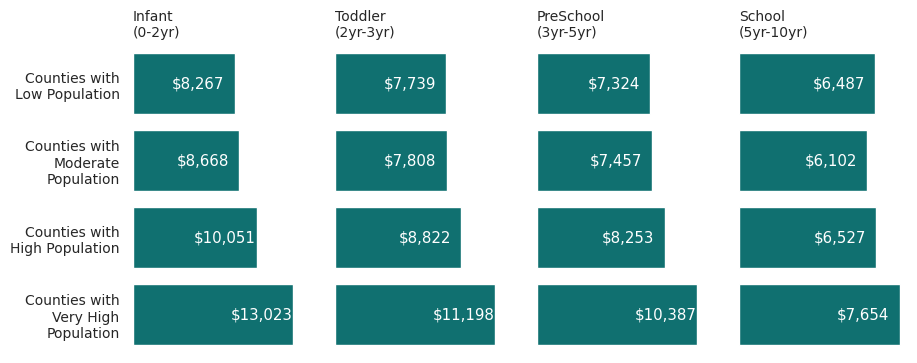

In [33]:
sns.set(font_scale=0.9)
fig, axs = plt.subplots(1, 4, figsize=(10, 4))

sns.barplot(x='infcb_yearly', y='pop_label', data = ndcp_subset2, ax=axs[0], errorbar=None,color ='teal')
sns.barplot(x='todcb_yearly', y='pop_label', data = ndcp_subset2, ax=axs[1], errorbar=None, color ='teal')
sns.barplot(x='prscb_yearly', y='pop_label', data = ndcp_subset2, ax=axs[2], errorbar=None, color ='teal')
sns.barplot(x='schcb_yearly', y='pop_label', data = ndcp_subset2, ax=axs[3], errorbar=None, color ='teal')

titles = ['Infant (0-2yr)','Toddler (2yr-3yr)','PreSchool (3yr-5yr)','School (5yr-10yr)']
labels = ['Counties with Low Population','Counties with Moderate Population','Counties with High Population','Counties with Very High Population']
wrapped_titles = [textwrap.fill(title, width=10) for title in titles]
labels = [ '\n'.join(wrap(l, 15)) for l in labels ]

for ax in axs:
    ax.set(ylabel=None)
    ax.set(xlabel=None)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set(facecolor = 'white')
    for container in ax.containers:
        ax.bar_label(container, fmt='${:,.0f}', label_type='edge', color = 'white', padding=-45)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
for ax, title in zip(axs.flat, wrapped_titles):
    ax.set_title(title,ha='left', x=0, fontsize=10)
    
axs[0].set_yticks([0,1,2,3])
axs[0].set_yticklabels(labels, fontsize=10)


plt.savefig('Center Based childcare Prices 2022.png')
plt.show() 

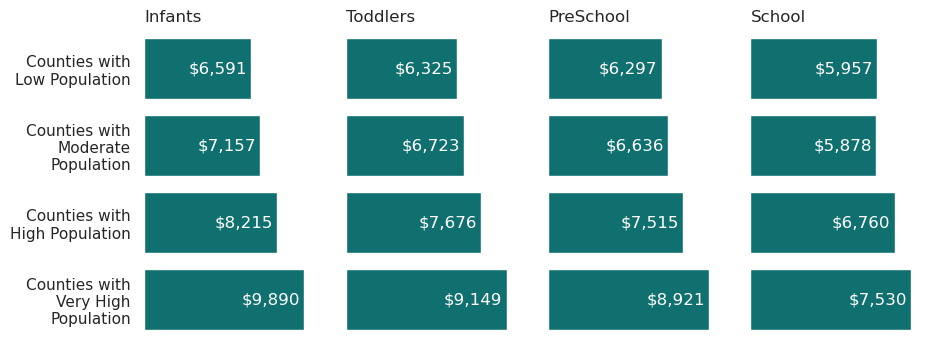

In [34]:
sns.set(font_scale=0.9)
fig, axs = plt.subplots(1, 4, figsize=(10, 4))

sns.barplot(x='inffc_yearly', y='pop_label', data = ndcp_subset2, ax=axs[0], errorbar=None,color ='teal')
axs[0].set_title('Infants',ha='left', x=0, size=12)
sns.barplot(x='todfc_yearly', y='pop_label', data = ndcp_subset2, ax=axs[1], errorbar=None, color ='teal')
axs[1].set_title('Toddlers',ha='left', x=0, size=12)
sns.barplot(x='prsfc_yearly', y='pop_label', data = ndcp_subset2, ax=axs[2], errorbar=None, color ='teal')
axs[2].set_title('PreSchool',ha='left', x=0, size=12)
sns.barplot(x='schfc_yearly', y='pop_label', data = ndcp_subset2, ax=axs[3], errorbar=None, color ='teal')
axs[3].set_title('School',ha='left', x=0, size=12)
for ax in axs:
    ax.set(ylabel=None)
    ax.set(xlabel=None)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set(facecolor = 'white')
    for container in ax.containers:
        ax.bar_label(container, fmt='${:,.0f}', label_type='edge',size=12, color = 'white', padding=-45)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
axs[0].set_yticks([0,1,2,3])
labels = ['Counties with Low Population','Counties with Moderate Population','Counties with High Population','Counties with Very High Population']
labels = [ '\n'.join(wrap(l, 16)) for l in labels ]
axs[0].set_yticklabels(labels, fontsize=11)
# plt.savefig('Family Care childcare Prices 2022.png')
plt.show() 

2. Top 5/10 States with highest Childcare costs for different age group

In [35]:
# Selecting data for the year 2022
# ndcp_subset2 = childcare_prices_df.copy()
ndcp_subset3 = childcare_prices_df.loc[(childcare_prices_df['year'] == '2022-01-01')].loc[(childcare_prices_df['state'] != 'District of Columbia')]
ndcp_subset3 = ndcp_subset3[['state', 'infant_cb', 'toddler_cb', 'preschool_cb', 'school_cb', 'infant_fc', 'toddler_fc', 'preschool_fc', 'school_fc']]
ndcp_subset3 = ndcp_subset3.groupby(['state']).agg('mean').round()
ndcp_subset3 = ndcp_subset3.reset_index()
ndcp_subset3 = ndcp_subset3.sort_values('infant_cb', ascending = False)
ndcp_subset3 = ndcp_subset3[0:10]
ndcp_subset3 = ndcp_subset3.set_index('state')
ndcp_subset3

,infant_cb,toddler_cb,preschool_cb,school_cb,infant_fc,toddler_fc,preschool_fc,school_fc
state,,,,,,,,
Massachusetts,396.0,356.0,282.0,207.0,265.0,242.0,232.0,232.0
California,345.0,237.0,219.0,163.0,270.0,239.0,235.0,212.0
Connecticut,329.0,329.0,261.0,124.0,238.0,234.0,234.0,123.0
Washington,307.0,241.0,241.0,196.0,230.0,200.0,201.0,185.0
Alaska,306.0,278.0,259.0,176.0,227.0,227.0,218.0,193.0
New Jersey,303.0,296.0,296.0,143.0,192.0,195.0,182.0,161.0
Rhode Island,297.0,286.0,251.0,65.0,262.0,257.0,214.0,218.0
Hawaii,295.0,204.0,204.0,41.0,177.0,174.0,174.0,NaN
New Hampshire,287.0,272.0,239.0,214.0,198.0,184.0,184.0,NaN


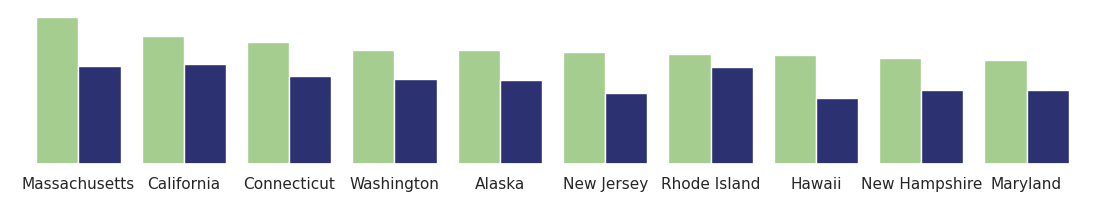

In [36]:
# Setting up parameters for the visualization
sns.set_theme(style='white')
sns.set(font_scale=1)
sns.set(font_scale=1,rc={"figure.figsize":(14, 2)})

# Creating line chart of share of energy sources in total electricity production
ax = ndcp_subset3[['infant_cb', 'infant_fc']].plot(kind='bar', width=0.8, edgecolor='white', colormap='crest')
ax.set(yticklabels=[]) 
ax.legend().set_visible(False)
plt.xticks(rotation=0)
ax.set(ylabel=None)
ax.set(xlabel=None)
ax.set(facecolor = "white")
plt.savefig('10 States with Highest Cost for CB and FC.png')
plt.show()

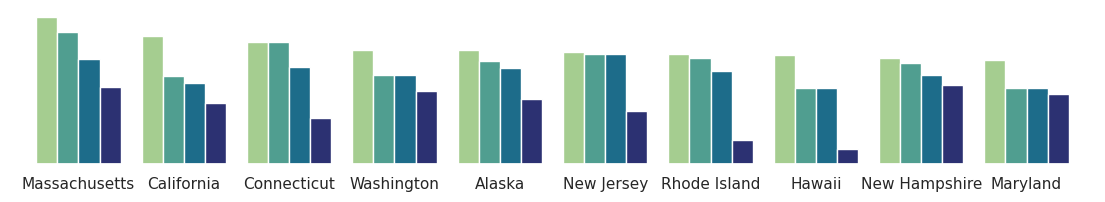

In [37]:
# Setting up parameters for the visualization
sns.set_theme(style='white')
sns.set(font_scale=1)
sns.set(font_scale=1,rc={"figure.figsize":(14, 2)})

# Creating line chart of share of energy sources in total electricity production
ax = ndcp_subset3[['infant_cb', 'toddler_cb', 'preschool_cb', 'school_cb']].plot(kind='bar', width=0.8, edgecolor='white', colormap='crest')
ax.set(yticklabels=[]) 
ax.legend().set_visible(False)
plt.xticks(rotation=0)
ax.set(ylabel=None)
ax.set(xlabel=None)
ax.set(facecolor = "white")
plt.savefig('10 States with costs from infants to school.png')
plt.show()

3. Change in Childcare Costs throughout the years 

In [38]:
ndcp_subset4 = ndcp_subset1.copy()
ndcp_subset4 = ndcp_subset4[['year','infcb_yearly','inffc_yearly']]
# ndcp_subset4 = ndcp_subset4.dropna()
ndcp_subset4 = ndcp_subset4.groupby(['year']).agg('mean').round()
ndcp_subset4 = ndcp_subset4.reset_index()
ndcp_subset5 = ndcp_subset4.iloc[13:,]
# ndcp_subset4['year1'] = ndcp_subset4['year'].apply(lambda x:x.strftime('%Y'))
# ndcp_subset4 = ndcp_subset4.drop(['year'],axis=1)
# ndcp_subset4 = ndcp_subset4.set_index('year1')
# ndcp_subset4 = ndcp_subset4.reset_index()
for i in ndcp_subset4.columns:
    try:
        ndcp_subset4[[i]] = ndcp_subset4[[i]].astype(float).astype(int)
    except:
        pass
ndcp_subset4

,year,infcb_yearly,inffc_yearly
0,2008-01-01,6959,5434
1,2009-01-01,6973,5546
2,2010-01-01,6974,5493
3,2011-01-01,7183,5578
4,2012-01-01,7357,5718
5,2013-01-01,7656,5936
6,2014-01-01,7835,6013
7,2015-01-01,7789,5986
8,2016-01-01,7818,6040
9,2017-01-01,8137,6283


In [39]:
ndcp_subset1.inffc_yearly.max()

21258.0

In [40]:
# % rise in CB and FC childcare prices in last 10 years
cb_rise =  ((9620 - 7656) / abs(7656) * 100)
fc_rise =  (7709 - 5936) / abs(5936) * 100

print(f'The Child care Costs for Center Based System has rise {cb_rise:0.2f}% in the the last 10 years.') 
print(f'The Child care Costs for Family Based System has rise {fc_rise:0.2f}% in the the last 10 years.') 

The Child care Costs for Center Based System has rise 25.65% in the the last 10 years.
The Child care Costs for Family Based System has rise 29.87% in the the last 10 years.


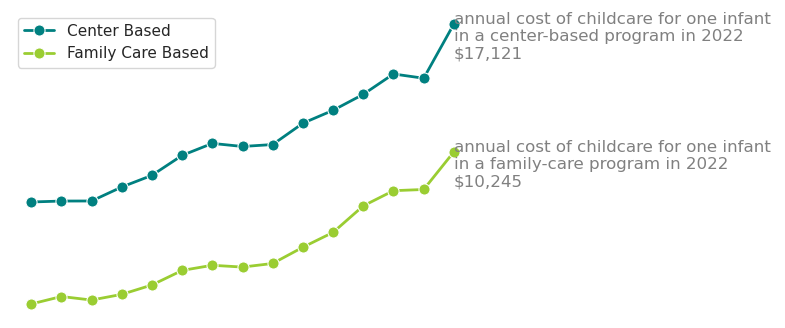

In [41]:
plt.figure(figsize = (6, 4))
sns.set(font_scale=0.8)
sns.set_theme(style='white')
# # sns.set_theme(style='white', palette='crest_r')

# # ax = sns.lineplot(data=ndcp_subset3, marker='o', markersize=6, linewidth =2, dashes=False,  palette='crest_r')
ax = sns.lineplot(data=ndcp_subset4, x='year', y='infcb_yearly', label = 'Center Based', color = 'teal',
                  errorbar=None, marker='o', markersize=8,linewidth =2)
ax = sns.lineplot(data=ndcp_subset4, x='year', y='inffc_yearly', label = 'Family Care Based', color = 'yellowgreen',
                  errorbar=None, marker='o', markersize=8,linewidth =2)
# # plt.ylim(0,12000)
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.legend(loc='upper left')
ax.set(facecolor = "white")
# # for x, y in zip(whi
# 

# for item in ndcp_subset4:
#     #item[1] is a grouped data frame
#     for x,y,m in ndcp_subset4[['year','infcb_yearly','infcb_yearly']].values:
#         ax.text(x,y,f'{m:.2f}')

#  # if y > 9000 or y == 6966:
for x, y in zip(ndcp_subset4['year'], ndcp_subset4['infcb_yearly']):
    if y > 9000:
     plt.text(x = x, # x-coordinate position of data label
     y = y-150, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = 'annual cost of childcare for one infant \nin a center-based program in 2022 \n$17,121'.format(y), # data label, formatted to ignore decimals
     color = 'grey', va = 'center_baseline', rotation = 'horizontal') # set colour of line
for x, y in zip(ndcp_subset4['year'], ndcp_subset4['inffc_yearly']):
    if y == 7709:
     plt.text(x = x, # x-coordinate position of data label
     y = y-150, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = 'annual cost of childcare for one infant \nin a family-care program in 2022 \n$10,245'.format(y), # data label, formatted to ignore decimals
     color = 'grey', va = 'center_baseline', rotation = 'horizontal') # set colour of line
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
# plt.savefig('Increasing Chilcare Costs Throughout the years 2016-2022.png')
plt.show()

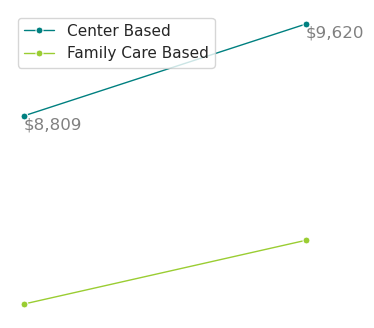

In [42]:
plt.figure(figsize = (4, 4))
sns.set(font_scale=0.8)
sns.set_theme(style='white')
# # sns.set_theme(style='white', palette='crest_r')

# # ax = sns.lineplot(data=ndcp_subset3, marker='o', markersize=6, linewidth =2, dashes=False,  palette='crest_r')
ax = sns.lineplot(data=ndcp_subset5, x='year', y='infcb_yearly', label = 'Center Based', color = 'teal',
                  errorbar=None, marker='o', markersize=5,linewidth =1)
ax = sns.lineplot(data=ndcp_subset5, x='year', y='inffc_yearly', label = 'Family Care Based', color = 'yellowgreen',
                  errorbar=None, marker='o', markersize=5,linewidth =1)
# # plt.ylim(0,12000)
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.legend(loc='upper left')
ax.set(facecolor = "white")
# # for x, y in zip(whi
# # plt.savefig('Increasing Chilcare Costs Throughout the years 2016-2022.png')

# # for item in ndcp_subset3:
# #     #item[1] is a grouped data frame
# #     for x,y,m in ndcp_subset3[['year1','infcb_yearly','infcb_yearly']].values:
# #         ax.text(x,y,f'{m:.2f}')

#  # if y > 9000 or y == 6966:
for x, y in zip(ndcp_subset5['year'], ndcp_subset5['infcb_yearly']):
     plt.text(x = x, # x-coordinate position of data label
     y = y-150, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = '${:,.0f}'.format(y), # data label, formatted to ignore decimals
     color = 'grey', va = 'bottom', rotation = 'horizontal',  rotation_mode ='anchor') # set colour of line
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
plt.show()

In [43]:
# ndcp_subset6 = ndcp_subset1.loc[(ndcp_subset1['year'] > '2012-01-01')]
ndcp_subset6 = ndcp_subset1[ndcp_subset1['year'].isin(['2013-01-01','2022-01-01'])]
ndcp_subset6 = ndcp_subset6[['state','county','year','infcb_yearly','inffc_yearly']]
ndcp_subset6

,state,county,year,infcb_yearly,inffc_yearly
5,Alabama,Autauga County,2013-01-01,5516.0,5379.0
14,Alabama,Autauga County,2022-01-01,7602.0,7077.0
20,Alabama,Baldwin County,2013-01-01,5559.0,5459.0
29,Alabama,Baldwin County,2022-01-01,6951.0,6751.0
35,Alabama,Barbour County,2013-01-01,4645.0,3994.0
...,...,...,...,...,...
48277,Puerto Rico,Villalba County,2022-01-01,NaN,NaN
48283,Puerto Rico,Yabucoa County,2013-01-01,NaN,NaN
48292,Puerto Rico,Yabucoa County,2022-01-01,NaN,NaN
48298,Puerto Rico,Yauco County,2013-01-01,NaN,NaN


## 2. US Parents Survey: 2022 PEW RESEARCH CENTER’S AMERICAN TRENDS PANEL SURVEY OF AMERICAN PARENTS

**1. If you needed to take a day or two off from work to care for a sick child or because of child care issues,
   how worried would you be about each of the following:**

**sickleave_a = Losing pay, sickleave_b = Losing your job**

1 = Extremely worried
2 = Very worried
3 = Somewhat worried
4 = Not too worried
5 = Not at all worried
* No answer

**2. Have there been times in the past 12 months when you did not have enough money for each of the following?**
   
**aff_food= buy food,	aff_medhealth=for medical or health care ,	aff_rent=rent or mortgage,	aff_childcare= child care**

1 = Yes
2 = No
3 = Have not needed this
* No answer

**3. Overall, compared with how you thought parenting would be, do you think being a parent has been…**
   
**parenting_exp**

1 = A lot easier
2 = Somewhat easier
3 = Neither easier nor harder
4 = Somewhat harder
5 = A lot harder
* No answer

**4. How often do you find being a parent to be…**
   
**parfeel_a=Enjoyable,	parfeel_b=Rewarding,	parfeel_c=Stressful,	parfeel_d=Tiring**

1. All of the time
2. Most of the time
3. Some of the time
4. Rarely
5. Never
* No answer

**5. For each of the following, who would you say does more?**
   
**kidtask_a=schedule and activities, kidtask_b=Providing comfort or emotional support, 
kidtask_c=Disciplining, kidtask_d=feeding,**
**bathing, or changing diapers,	kidtask_e=homework or other school assignments**

1. You do more than your spouse or partner
2. Your spouse or partner does more than you
3. Both about equally
* No answerwer

In [44]:
parents_survey_subset1 = parents_survey_df[['sickleave_a','sickleave_b']]
parents_survey_subset1 = parents_survey_subset1.apply(pd.Series.value_counts).rename_axis('input').reset_index()
parents_survey_subset1

,input,sickleave_a,sickleave_b
0,1,293.0,143
1,2,230.0,108
2,3,428.0,285
3,4,617.0,620
4,5,2177.0,2432
5,6,NaN,166
6,99,12.0,3


In [45]:
# parents_survey_subset1 = parents_survey_subset1[0:3]
plot_subset1 = parents_survey_subset1[parents_survey_subset1['input'].isin([1,2,3])]
row_names = {0:'Extremely worried', 1:'Very worried', 2:'Somewhat worried'}
plot_subset1 = plot_subset1.rename(index = row_names).rename_axis('desc').reset_index()
plot_subset1 = plot_subset1.rename(columns = {'sickleave_a':'Losing Pay','sickleave_b':'Losing Job'})

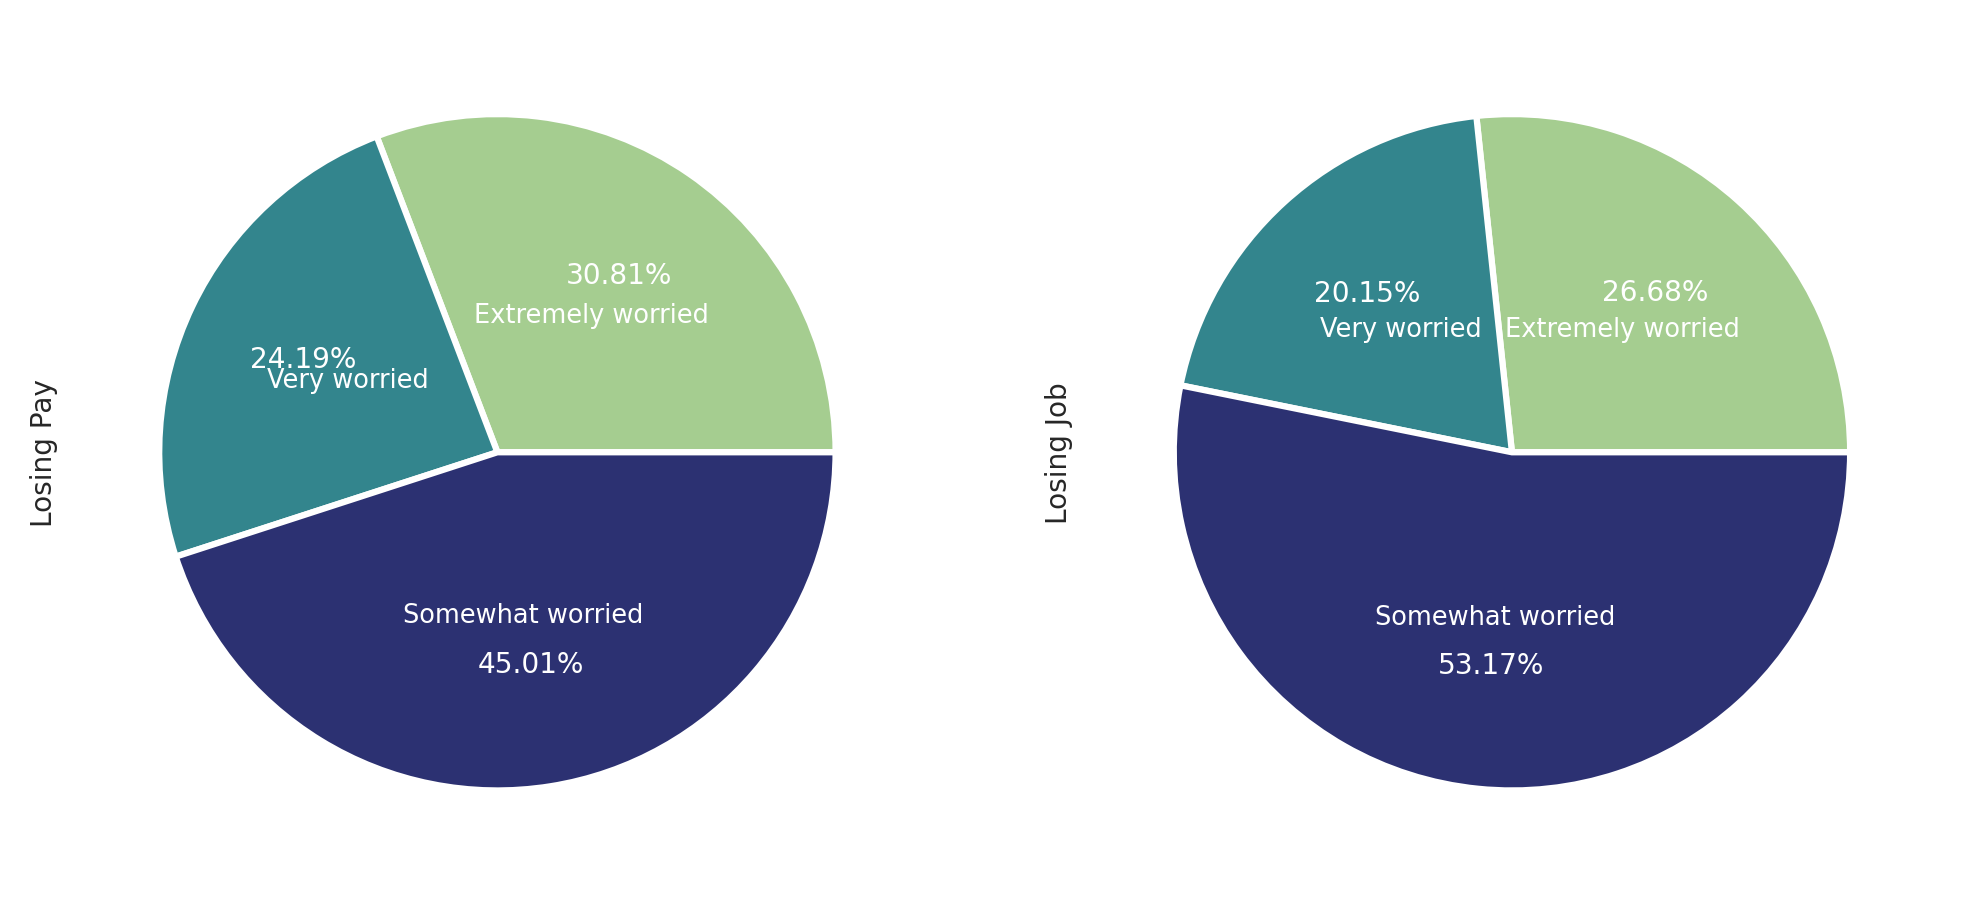

In [46]:
fig = plt.figure(figsize=(10,10),dpi=300)
sns.set(font_scale=0.56)
ax = fig.add_subplot(121)
plot_subset1['Losing Pay'].plot.pie(figsize=(8,8),colormap='crest',labels=plot_subset1['desc'], autopct='%1.2f%%',labeldistance=0.49,
                                     pctdistance=0.635, wedgeprops = {'linewidth' : 1.5, 'edgecolor' : 'white'}, textprops={'color':'w','ha':'center'})
ax = fig.add_subplot(122)
plot_subset1['Losing Job'].plot.pie(figsize=(8,8),colormap='crest',labels=plot_subset1['desc'], autopct='%1.2f%%',labeldistance=0.49, 
                                     pctdistance=0.635, wedgeprops = {'linewidth' : 1.5, 'edgecolor' : 'white'}, textprops={'color':'w','ha':'center'})
# plt.savefig('sick leave impact on job.png')
plt.show()

In [47]:
parents_survey_subset2 = parents_survey_df[['aff_food','aff_medhealth','aff_rent','aff_childcare']]
parents_survey_subset2 = parents_survey_subset2.apply(pd.Series.value_counts).rename_axis('input').reset_index()

In [48]:
# parents_survey_subset1 = parents_survey_subset1[0:3]
parents_survey_subset2 = parents_survey_subset2[parents_survey_subset2['input'].isin([1,2,3])]
row_names = {0:'Yes', 1:'No', 2:'Not Needed'}
parents_survey_subset2 = parents_survey_subset2.rename(index = row_names).rename_axis('desc').reset_index()
parents_survey_subset2 = parents_survey_subset2.rename(columns = {'aff_food':'Food','aff_medhealth':'Healthcare','aff_rent':'Rent', 'aff_childcare':'Childcare'})

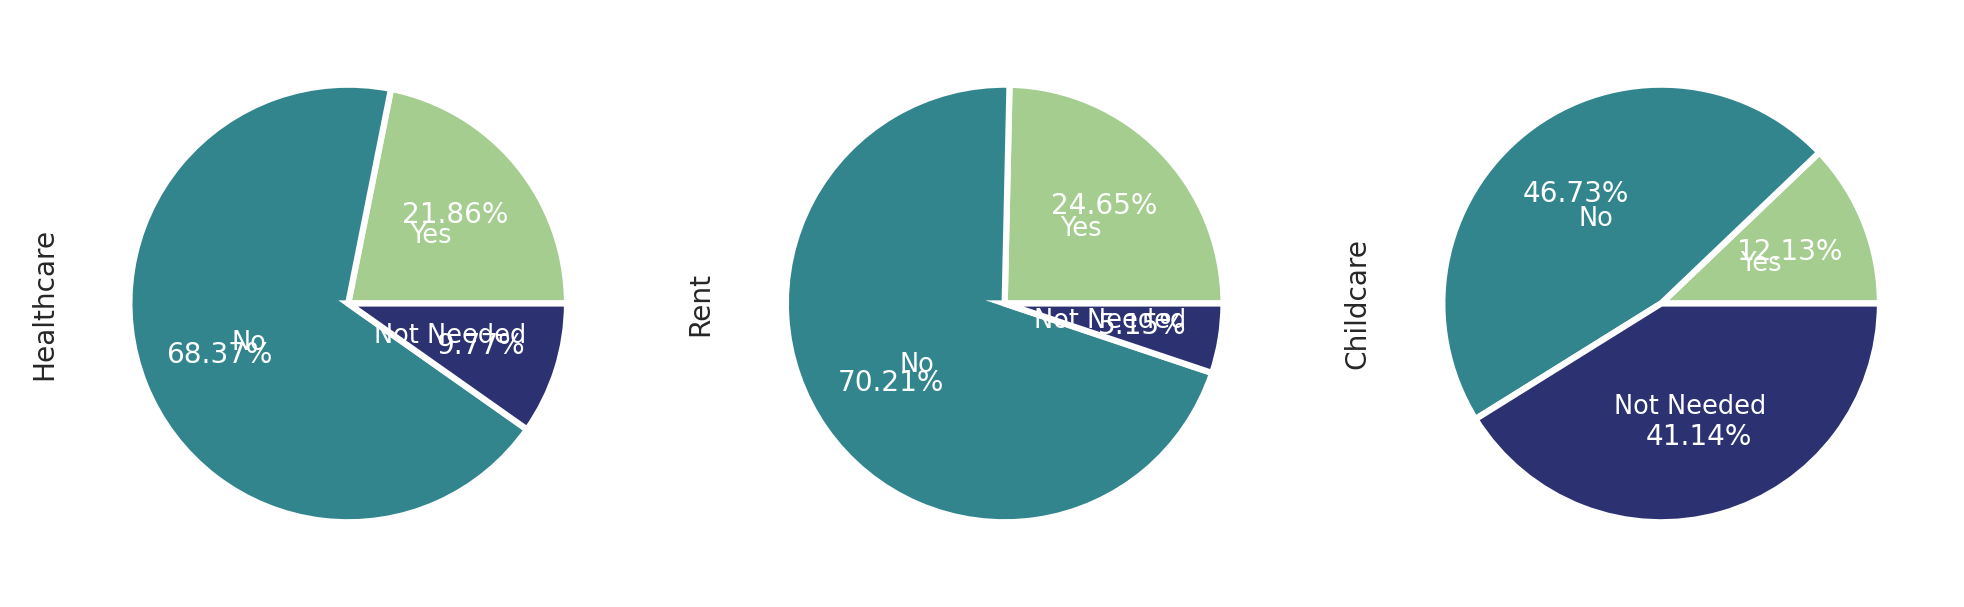

In [49]:
fig = plt.figure(figsize=(10,10),dpi=300)
sns.set(font_scale=0.56)
ax = fig.add_subplot(131)
parents_survey_subset2['Healthcare'].plot.pie(figsize=(8,8),colormap='crest',labels=parents_survey_subset2['desc'], autopct='%1.2f%%',labeldistance=0.49,
                                     pctdistance=0.635, wedgeprops = {'linewidth' : 1.5, 'edgecolor' : 'white'}, textprops={'color':'w','ha':'center'})
ax = fig.add_subplot(132)
parents_survey_subset2['Rent'].plot.pie(figsize=(8,8),colormap='crest',labels=parents_survey_subset2['desc'], autopct='%1.2f%%',labeldistance=0.49, 
                                     pctdistance=0.635, wedgeprops = {'linewidth' : 1.5, 'edgecolor' : 'white'}, textprops={'color':'w','ha':'center'})
ax = fig.add_subplot(133)
parents_survey_subset2['Childcare'].plot.pie(figsize=(8,8),colormap='crest',labels=parents_survey_subset2['desc'], autopct='%1.2f%%',labeldistance=0.49, 
                                     pctdistance=0.635, wedgeprops = {'linewidth' : 1.5, 'edgecolor' : 'white'}, textprops={'color':'w','ha':'center'})
# plt.savefig('Struggled with Finance.png')
plt.show()

In [50]:
# parents_survey_subset3= parents_survey_df[['marital_status','sex','parfeel_a','parfeel_b','parfeel_c','parfeel_d']]
# status_map = {1: 'Married',2: 'Living with a partner',3: 'Divorced',4: 'Separated',5: 'Widowed',6: 'Never been married',99: 'Refused'}
# sex_map = {1: 'Mother',2: 'Father',3:'In some other way',99:'Refused'}
# parents_survey_subset3['marital_status'] = parents_survey_subset3['marital_status'].apply(lambda x: status_map[x])
# parents_survey_subset3['sex'] = parents_survey_subset3['sex'].apply(lambda x: sex_map[x])
parents_survey_subset3= parents_survey_df[['parfeel_c','parfeel_d']]
parents_survey_subset3 = parents_survey_subset3.apply(pd.Series.value_counts).rename_axis('input').reset_index()

In [51]:
# parents_survey_subset1 = parents_survey_subset1[0:3]
parents_survey_subset3 = parents_survey_subset3[parents_survey_subset3['input'].isin([1,2,3])]
row_names = {0:'All of the time', 1:'Most of the time', 2:'Some of the time'}
parents_survey_subset3 = parents_survey_subset3.rename(index = row_names).rename_axis('desc').reset_index()
parents_survey_subset3 = parents_survey_subset3.rename(columns = {'parfeel_c':'Stressful','parfeel_d':'Tiring'})

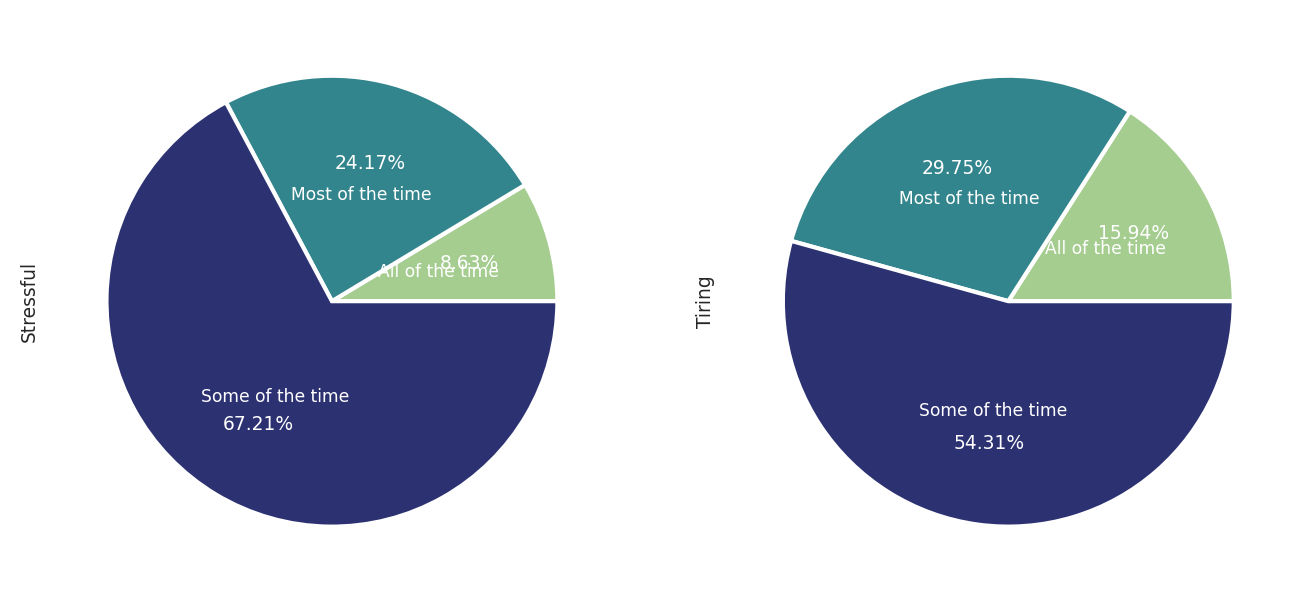

In [52]:
fig = plt.figure(figsize=(10,10),dpi=200)
sns.set(font_scale=0.56)
ax = fig.add_subplot(121)
parents_survey_subset3['Stressful'].plot.pie(figsize=(8,8),colormap='crest',labels=parents_survey_subset3['desc'], autopct='%1.2f%%',labeldistance=0.49,
                                     pctdistance=0.635, wedgeprops = {'linewidth' : 1.5, 'edgecolor' : 'white'}, textprops={'color':'w','ha':'center'})
ax = fig.add_subplot(122)
parents_survey_subset3['Tiring'].plot.pie(figsize=(8,8),colormap='crest',labels=parents_survey_subset3['desc'], autopct='%1.2f%%',labeldistance=0.49, 
                                     pctdistance=0.635, wedgeprops = {'linewidth' : 1.5, 'edgecolor' : 'white'}, textprops={'color':'w','ha':'center'})
# plt.savefig('Parenting Experience_1.png')
plt.show()

In [53]:
parents_survey_subset4= parents_survey_df[['parenting_exp']]
parents_survey_subset4 = parents_survey_subset4.apply(pd.Series.value_counts).rename_axis('input').reset_index()

In [54]:
# parents_survey_subset1 = parents_survey_subset1[0:3]
parents_survey_subset4 = parents_survey_subset4[parents_survey_subset4['input'].isin([5,4,2])]
row_names = {0:'Somewhat harder', 2:'A lot Harder', 3:'Somewhat easier'}
parents_survey_subset4 = parents_survey_subset4.rename(index = row_names).rename_axis('desc').reset_index()
parents_survey_subset4 = parents_survey_subset4.rename(columns = {'parenting_exp':'Parenting is'})

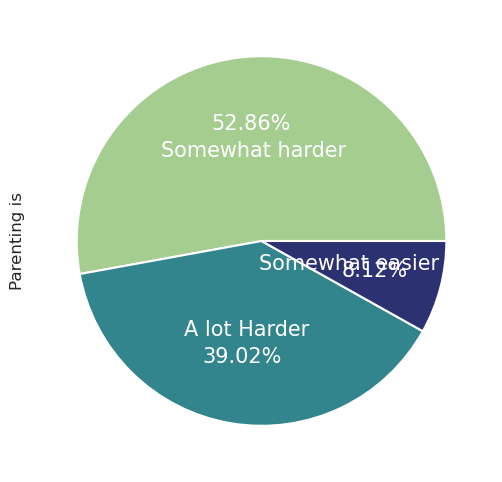

In [55]:
fig = plt.figure(figsize=(6,6),dpi=100)
sns.set(font_scale=1)
parents_survey_subset4['Parenting is'].plot.pie(figsize=(6,6),colormap='crest',labels=parents_survey_subset4['desc'], autopct='%1.2f%%',labeldistance=0.49,
                                     pctdistance=0.635, wedgeprops = {'linewidth' : 1.5, 'edgecolor' : 'white'}, textprops={'color':'w','ha':'center', "size" : 15})
# plt.savefig('Parenting Experience_2.png')
plt.show()

In [56]:
parents_survey_subset5 = parents_survey_df[['kidtask_a','kidtask_b','kidtask_c','kidtask_d','kidtask_e']]
parents_survey_subset5 = parents_survey_subset5.apply(pd.Series.value_counts).rename_axis('input').reset_index()

In [57]:
# parents_survey_subset1 = parents_survey_subset1[0:3]
parents_survey_subset5 = parents_survey_subset5[parents_survey_subset5['input'].isin([1,2,3])]
row_names = {0:'You', 1:'Partner', 2:'Both'}
parents_survey_subset5 = parents_survey_subset5.rename(index = row_names).rename_axis('desc').reset_index()
# parents_survey_subset5 = parents_survey_subset5.rename(columns = {'kidtask_a':'Schedule and Activities','kidtask_b','kidtask_c','kidtask_d','kidtask_e'})

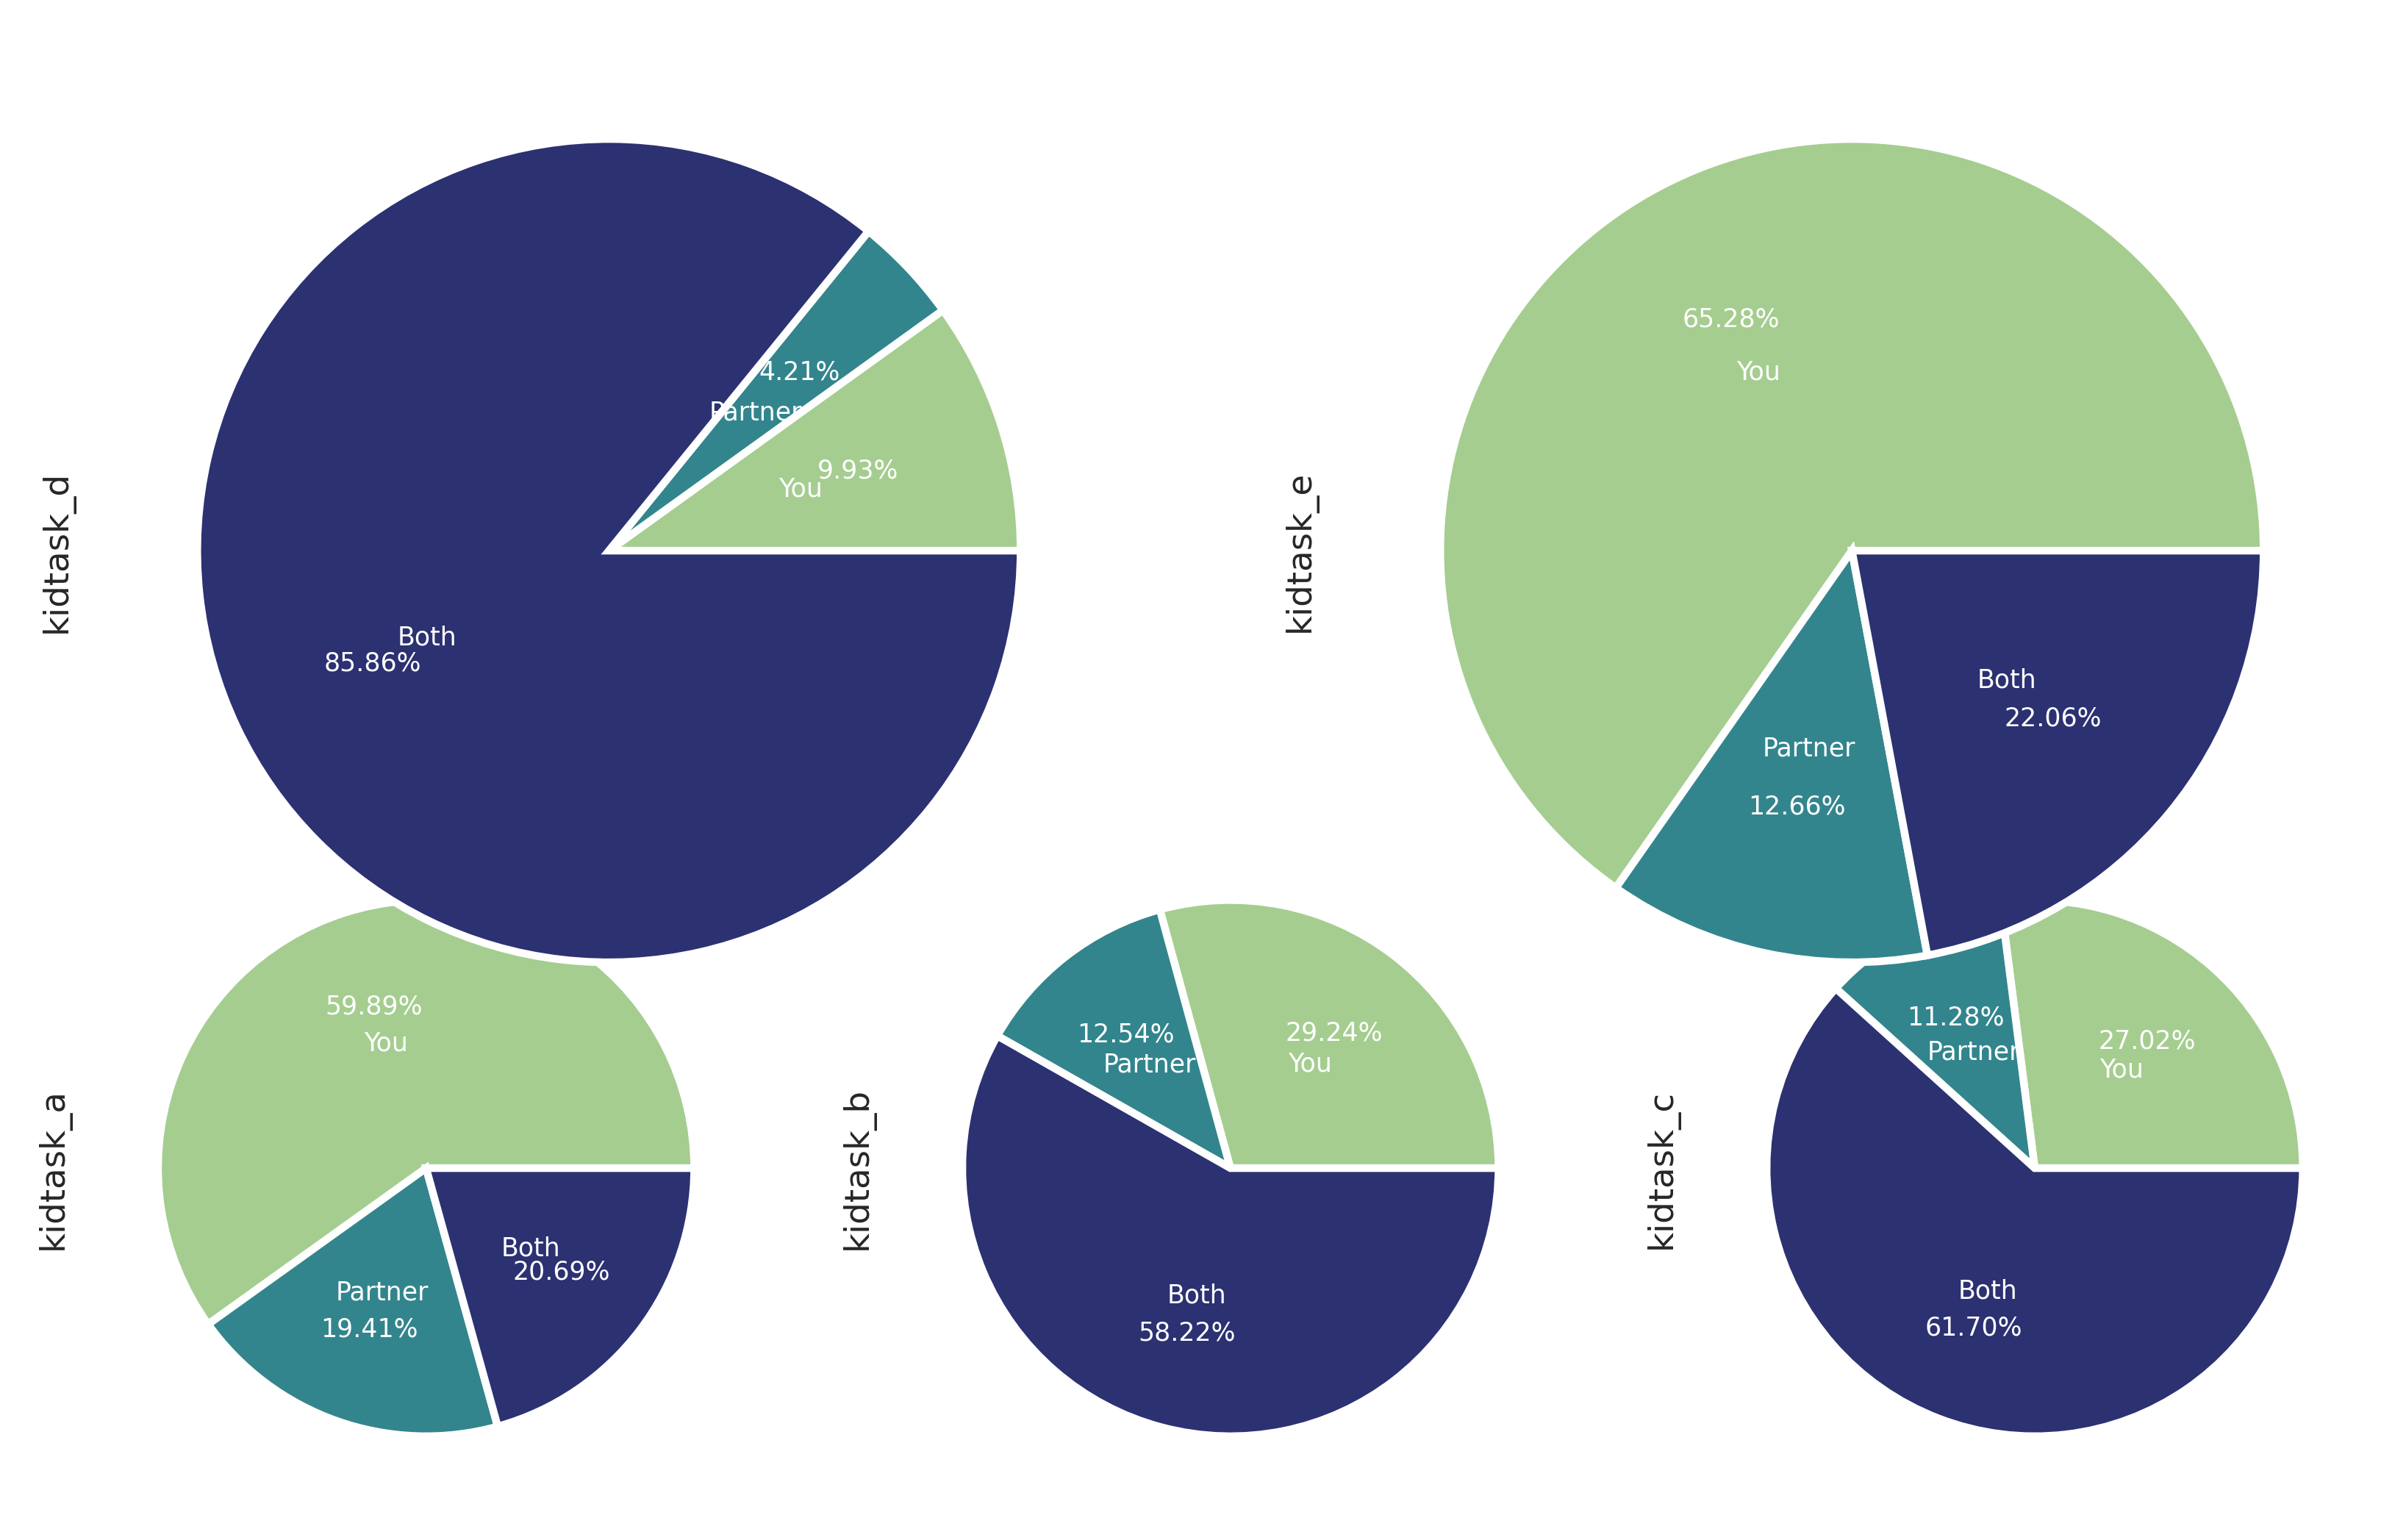

In [58]:
fig = plt.figure(figsize=(8,8),dpi=500)
sns.set(font_scale=0.56)
ax = fig.add_subplot(131)
parents_survey_subset5['kidtask_a'].plot.pie(figsize=(8,8),colormap='crest',labels=parents_survey_subset5['desc'], autopct='%1.2f%%',labeldistance=0.49,
                                     pctdistance=0.635, wedgeprops = {'linewidth' : 1.5, 'edgecolor' : 'white'}, textprops={'color':'w','ha':'center',"size" : 5})
ax = fig.add_subplot(132)
parents_survey_subset5['kidtask_b'].plot.pie(figsize=(8,8),colormap='crest',labels=parents_survey_subset5['desc'], autopct='%1.2f%%',labeldistance=0.49, 
                                     pctdistance=0.635, wedgeprops = {'linewidth' : 1.5, 'edgecolor' : 'white'}, textprops={'color':'w','ha':'center',"size" : 5})
ax = fig.add_subplot(133)
parents_survey_subset5['kidtask_c'].plot.pie(figsize=(8,8),colormap='crest',labels=parents_survey_subset5['desc'], autopct='%1.2f%%',labeldistance=0.49, 
                                     pctdistance=0.635, wedgeprops = {'linewidth' : 1.5, 'edgecolor' : 'white'}, textprops={'color':'w','ha':'center',"size" : 5})
ax = fig.add_subplot(221)
parents_survey_subset5['kidtask_d'].plot.pie(figsize=(8,8),colormap='crest',labels=parents_survey_subset5['desc'], autopct='%1.2f%%',labeldistance=0.49, 
                                     pctdistance=0.635, wedgeprops = {'linewidth' : 1.5, 'edgecolor' : 'white'}, textprops={'color':'w','ha':'center',"size" : 5})
ax = fig.add_subplot(222)
parents_survey_subset5['kidtask_e'].plot.pie(figsize=(8,8),colormap='crest',labels=parents_survey_subset5['desc'], autopct='%1.2f%%',labeldistance=0.49, 
                                     pctdistance=0.635, wedgeprops = {'linewidth' : 1.5, 'edgecolor' : 'white'}, textprops={'color':'w','ha':'center',"size" : 5})
# plt.savefig('Sharing Household Duties.png')
plt.show()